<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>What Are Tools in Agentic AI?</title>
  <style>
    body { font-family: 'Segoe UI', Arial, sans-serif; background: #fafbfc; color: #23272f; line-height: 1.7; margin: 0; padding: 2rem; }
    h1, h2, h3 { color: #2057cb; }
    table {
      background-color: yellow;
      color: black;
      border-collapse: collapse;
      width: 100%;
      margin: 1.5em 0;
    }
    th, td {
      border: 1px solid #000;
      padding: 0.75em;
      text-align: left;
    }
    th {
      background: #ffe066;
      color: black;
    }
    tr:nth-child(even) { background: #fff6b3; }
    .highlight { background: #e0f5e6; padding: 0.7em; border-radius: 5px; margin: 1em 0; }
    ul, ol { margin-bottom: 1em; }
    @media (max-width: 700px) {
      body { padding: 1rem; }
      table, th, td { font-size: 0.98em; }
    }
  </style>
</head>
<body>
  <h1>🛠️ What Are Tools in Agentic AI?</h1>
  <p><strong>Tools</strong> are special functions or APIs that an agent can call to perform tasks <strong>beyond just generating text</strong>.<br>
  They are how an AI agent can “take actions” in the real world or fetch real-time information, not just respond with words.</p>
  
  <h2>🔑 Key Ideas</h2>
  <ul>
    <li><strong>Think of tools as capabilities or “superpowers” you give your agent.</strong></li>
    <li>The agent decides (using its language model) <em>when</em> and <em>how</em> to use a tool, based on user input and its reasoning.</li>
  </ul>
  
  <h2>🧩 Common Examples of Tools</h2>
  <table>
    <thead>
      <tr>
        <th>Tool Type</th>
        <th>What It Does</th>
        <th>Example</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Search Tool</td>
        <td>Looks up info on the web</td>
        <td>Google search API, Tavily</td>
      </tr>
      <tr>
        <td>Calculator Tool</td>
        <td>Performs math calculations</td>
        <td>Custom Python function</td>
      </tr>
      <tr>
        <td>Database/Knowledge Tool</td>
        <td>Queries a database or knowledge base</td>
        <td>SQL query, Wikipedia retriever</td>
      </tr>
      <tr>
        <td>API Tool</td>
        <td>Interacts with other software/services</td>
        <td>Weather API, Email sender</td>
      </tr>
      <tr>
        <td>File Tool</td>
        <td>Reads/writes files</td>
        <td>File uploader, PDF reader</td>
      </tr>
      <tr>
        <td>Custom Action</td>
        <td>Any logic you define in code</td>
        <td>Turn on a smart light, send SMS</td>
      </tr>
    </tbody>
  </table>
  
  <h2>⚡ Why Tools Matter</h2>
  <ul>
    <li><strong>Extend LLM abilities:</strong> Language models (like GPT-4) are great at conversation, but can’t search the web, do complex math, or interact with your systems <em>unless</em> you give them tools.</li>
    <li><strong>Real-world actions:</strong> Agents become truly “autonomous” and “useful” when they can <em>do</em> things, not just <em>say</em> things.</li>
    <li><strong>Modular:</strong> You can add/remove tools based on what you want your agent to be able to do.</li>
  </ul>
  
  <h2>🚩 In Summary</h2>
  <ul>
    <li><strong>Tools in Agentic AI = Actions/functions/APIs the agent can use.</strong></li>
    <li>They make the agent much more powerful, letting it <em>do</em> things (not just chat).</li>
    <li>Tools can be prebuilt (like web search) or custom (anything you code).</li>
    <li>Tools you can explore: <a href="https://python.langchain.com/docs/integrations/tools/" target="_blank">https://python.langchain.com/docs/integrations/tools/</a></li>

  </ul>
  
</body>
</html>


In [1]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
import gradio as gr

from langgraph.prebuilt import ToolNode, tools_condition

from dotenv import load_dotenv
load_dotenv(override=True)

a:\Indian_AI_Production_5\agentic_ai\agentic_ai_projects\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
from langchain_tavily import TavilySearch

search_tool = TavilySearch(
    max_results=4,
    # topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

In [3]:
search_tool.invoke("What is Indian AI Production?")

{'query': 'What is Indian AI Production?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://indianaiproduction.com/',
   'title': 'Indian AI Production: Home',
   'content': 'Indian AI Production provide online training in disciplines such as Artificial Intelligence, Machine Learning, Deep Learning, and Data Science among others,',
   'score': 0.98541,
   'raw_content': None},
  {'url': 'https://indianaiproduction.com/about-us/',
   'title': 'About Us - Indian AI Production',
   'content': 'Indian AI Production provide online training in disciplines such as Artificial Intelligence, Machine Learning, Deep Learning, and Data Science among others,',
   'score': 0.98188,
   'raw_content': None},
  {'url': 'https://en.wikipedia.org/wiki/Artificial_intelligence_in_India',
   'title': 'Artificial intelligence in India - Wikipedia',
   'content': 'In India, the development of AI has been similarly transformative, with applications in healthcare, finan

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [5]:
gpt_models_name = 'gpt-4.1-nano-2025-04-14'
llm = init_chat_model(gpt_models_name)

In [6]:
tools = [search_tool]

llm_with_tools = llm.bind_tools(tools)

In [7]:
llm_with_tools.invoke(['What is the current weather of Bangalore?'])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_yLSrRaRGYipcOnzhvv0rX0eM', 'function': {'arguments': '{"query":"current weather in Bangalore"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 1276, 'total_tokens': 1295, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C1FruhX8do4SJZiJpAYoIqHc5owSG', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e0991fb5-80e4-45ea-865b-390b95939ffc-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'current weather in Bangalore'}, 'id': 'call_yLSrRaRGYipcOnzhvv0rX0eM', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1276, 'output_token

In [8]:
llm_with_tools.invoke(['Hi'])

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 1269, 'total_tokens': 1279, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C1FrwwKr24iJHFeuGzY4PESFl8kSu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--29dc79f7-8029-40ed-bd07-0c12e8a79af2-0', usage_metadata={'input_tokens': 1269, 'output_tokens': 10, 'total_tokens': 1279, 'input_token_details': {'audio': 0, 'cache_read': 1152}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
def chatbot(state: State)->State:
    response = llm.bind_tools(tools).invoke(state['messages'])
    return State(messages=response)

In [10]:
tool_node = ToolNode(tools=tools)


In [11]:
graph_builder.add_node('chatbot', chatbot)
graph_builder.add_node('tools', tool_node)

In [12]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_conditional_edges('chatbot', tools_condition)
graph_builder.add_edge('tools', 'chatbot')

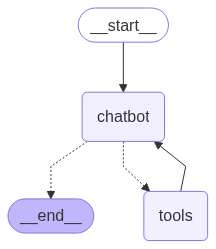

In [13]:
graph = graph_builder.compile()
graph

In [14]:
graph_response = graph.invoke({'messages':["Who are you?"]})
graph_response

{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='8d9a9fcc-919e-4a0b-9868-afcd493531ff'),
  AIMessage(content='I am an AI language model created to assist with your questions and tasks. How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 1272, 'total_tokens': 1295, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C1FxJBD4WJWLYhOlcwsPEra3Aa6i5', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--95268567-1e8b-422d-9be3-76a7d827e56e-0', usage_metadata={'input_tokens': 1272, 'output_tokens': 23, 'total_tokens': 1295, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'outp

In [15]:
graph_response = graph.invoke({'messages':['What is the current weather of Bangalore?']})
graph_response

{'messages': [HumanMessage(content='What is the current weather of Bangalore?', additional_kwargs={}, response_metadata={}, id='f15f7369-7901-414a-8b2c-8aa0b5d30dd6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5Eu0w7RmEpoGM2KEnOellwtQ', 'function': {'arguments': '{"query":"current weather in Bangalore"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 1276, 'total_tokens': 1295, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C1FzPBRUU0J9b9hGZpZlCwR3IzDoO', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--464e9ba4-41e2-4afd-85ef-88fe19ce85de-0', tool_calls=[{'name': 'tavily_sea

In [18]:
human_message = graph_response['messages'][0].content
ai_message = graph_response['messages'][-1].content

In [22]:
print("Human message: ", human_message)
print("AI message: ", ai_message)

Human message:  What is the current weather of Bangalore?
AI message:  The current weather in Bangalore is partly cloudy with a temperature of approximately 22.2°C. The humidity level is around 88%, and there is light wind coming from the south-southeast at about 6.1 km/h. The weather is relatively cool and slightly humid at this time.


In [23]:
def chatbot_app(user_input: str, history)->str:
    initial_state = State(messages=[{'role':'user', 'content':user_input}])
    response = graph.invoke(initial_state)

    huamn_message = response['messages'][0].content
    ai_message = response['messages'][-1].content

    print("User :", huamn_message)
    print("AI :", ai_message)
    print("--"*20)

    return ai_message

In [ ]:
gr.ChatInterface(chatbot_app, type='messages').launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


User : Hi
AI : Hello! How can I assist you today?
----------------------------------------
User : what is my name
AI : I don't know your name. Could you please tell me what it is?
----------------------------------------
User : my name is Raju
AI : Hello, Raju! How can I assist you today?
----------------------------------------
User : what is my name
AI : I don't know your name. Could you please tell me your name?
----------------------------------------
User : what is todays date
AI : Today's date is April 27, 2024.
----------------------------------------
User : todays date is 5 aug 2025
AI : Got it. Today's date is August 5, 2025. How can I assist you today?
----------------------------------------
User : what is current date
AI : I don't have real-time capabilities to access the current date. However, you can easily find the current date on your device or by asking a digital assistant. Would you like me to help with anything else?
----------------------------------------
User : wh